## Data exploration of people with a missing age

Try to understand if these 702 people have some particular characteristics


In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import utils
#import xgboost as xgb
%matplotlib inline

RANDOM_SEED = 4321
np.random.seed = RANDOM_SEED

In [10]:
train = pd.read_csv('data/train_all_features.csv')
test = pd.read_csv('data/test_all_features.csv')

train_x = train.drop(['CUST_COD', 'DEFAULT PAYMENT JAN'], axis=1)
train_y = train['DEFAULT PAYMENT JAN'].ravel()
test_x = test.drop(['CUST_COD', 'DEFAULT PAYMENT JAN'], axis = 1)

x_train, x_validation, y_train, y_validation = train_test_split(train_x, 
                                            train_y, test_size=0.3, random_state=RANDOM_SEED)
x_test = test_x.copy()

x_train.index = np.arange(len(x_train))
x_validation.index = np.arange(len(x_validation))

In [46]:
train_ma=train.loc[train["AGE_MISSING"]==1]

train_ma_x=train_ma.drop(['CUST_COD', 'DEFAULT PAYMENT JAN','AGE_MISSING','AGE'], axis=1)
train_ma_y=train_ma['DEFAULT PAYMENT JAN'].ravel()

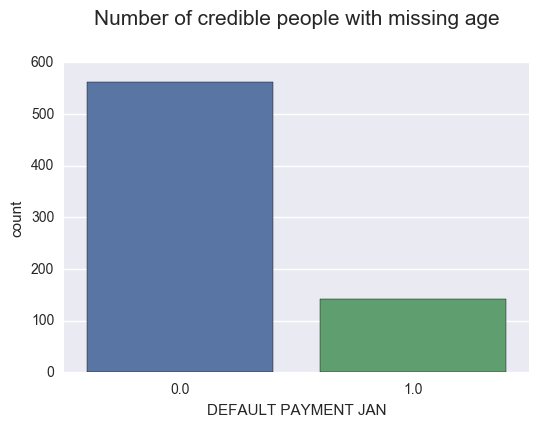

In [43]:
plt.title('Number of credible people with missing age', y=1.1, size=15)
sns.countplot('DEFAULT PAYMENT JAN', data=train_ma)

In [48]:
num_of_default_people=0
for i in train_ma_y:
    if i==1:
        num_of_default_people+=1
print("Number of default people with a missing age:",num_of_default_people)
print("Number of NOT default people with a missing age:", 702-num_of_default_people)


Number of default people with a missing age: 141
Number of NOT default people with a missing age: 561


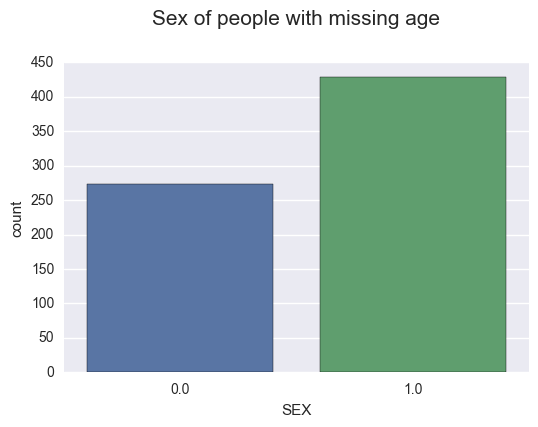

In [49]:
plt.title('Sex of people with missing age', y=1.1, size=15)
sns.countplot('SEX', data=train_ma)

Most of people with missing age are female, indeed in the whole dataset women are the majority class.
Let's see which is the mean value of age, gruped by sex, in the original dataset.

In [70]:
f=train.loc[(train["AGE_MISSING"]==0) & (train["SEX"]==1)]
m=train.loc[(train["AGE_MISSING"]==0) & (train["SEX"]==0)]
print("FEMALE avg age:",f["AGE"].mean())
print("MALE avg age:",m["AGE"].mean())

FEMALE avg age: 35.83177158669266
MALE avg age: 37.50335570469799


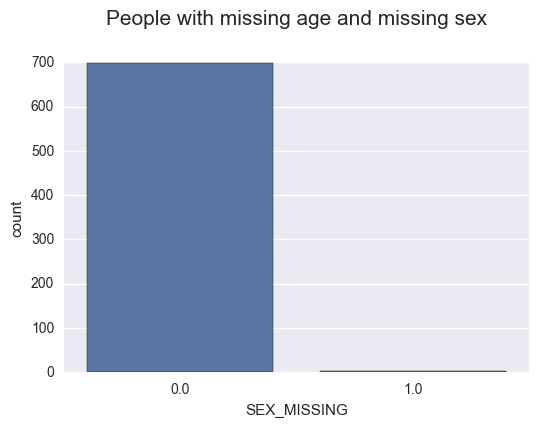

In [77]:
plt.title('People with missing age and missing sex', y=1.1, size=15)
sns.countplot(x='SEX_MISSING', data=train_ma)

/Users/carmen/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1468: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 698 but corresponding boolean dimension is 17
  stat_data = remove_na(group_data[hue_mask])
/Users/carmen/anaconda/lib/python3.5/site-packages/seaborn/categorical.py:1468: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 4 but corresponding boolean dimension is 1
  stat_data = remove_na(group_data[hue_mask])


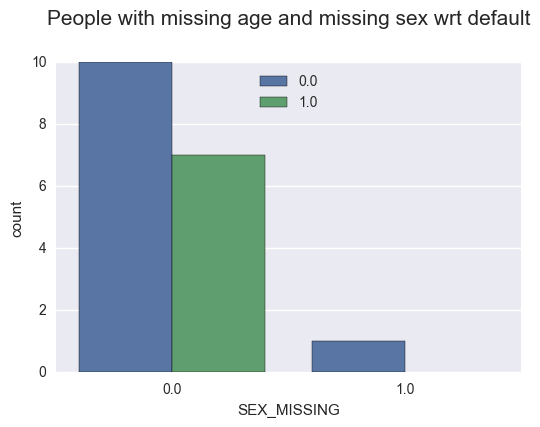

In [88]:
plt.title('People with missing age and missing sex wrt default', y=1.1, size=15)
sns.countplot(x='SEX_MISSING',hue=train_ma_y, data=train_ma)

In [84]:
num_of_missing_sex_people=0
for i in train_ma["SEX_MISSING"]:
    if i==1.0:
        num_of_missing_sex_people+=1
print("Number of people with missing age and missing sex:",num_of_missing_sex_people)

Number of people with missing age and missing sex: 4


We have only 4 people with both missing age and missing sex, and all of them are not to in default in January. They can be eliminate because maybe these 4 samples are not reliable.

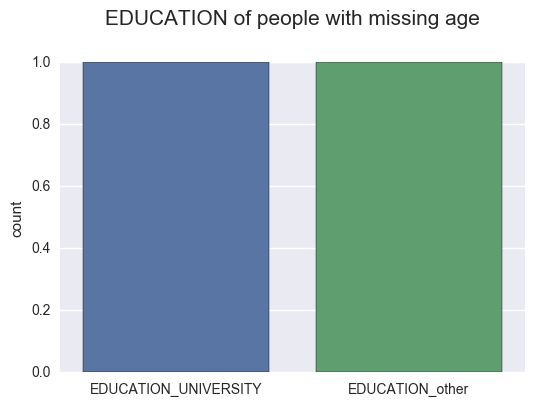

In [61]:
plt.title('EDUCATION of people with missing age', y=1.1, size=15)
sns.countplot(x=['EDUCATION_UNIVERSITY','EDUCATION_other'], data=train_ma)

The type of education is not very relevant

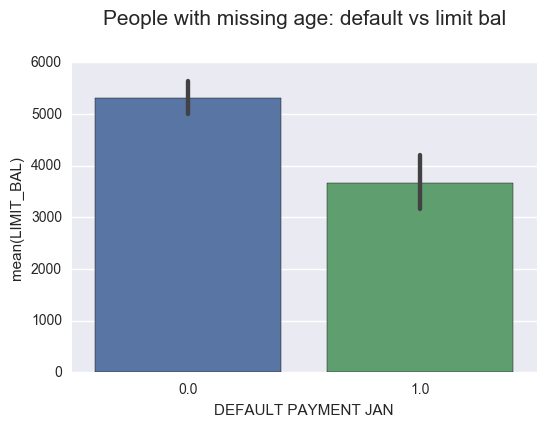

In [95]:
plt.title('People with missing age: default vs limit bal', y=1.1, size=15)
sns.barplot(x='DEFAULT PAYMENT JAN',y='LIMIT_BAL', data=train_ma)

The distribution of limit balance gruped by people that will [not] be in default, seems to be the same as the one found in the original whole dataset

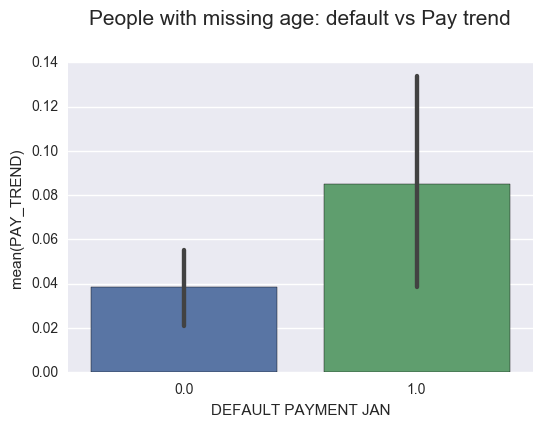

In [96]:
plt.title('People with missing age: default vs Pay trend', y=1.1, size=15)
sns.barplot(x='DEFAULT PAYMENT JAN',y='PAY_TREND', data=train_ma)

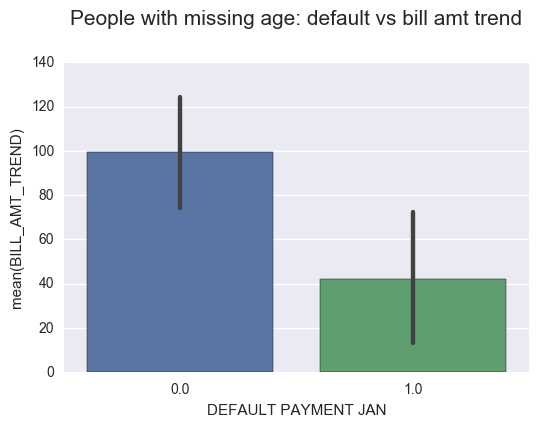

In [97]:
plt.title('People with missing age: default vs bill amt trend', y=1.1, size=15)
sns.barplot(x='DEFAULT PAYMENT JAN',y='BILL_AMT_TREND', data=train_ma)

## Considerazioni: 
-non credo sia giusto eliminare completamente le persone con età mancante visto che 141 su 702 sono in default



-si potrebbero eliminare i quattro tizi che non sono in default e hanno sia sesso che età mancante (magari sono dati non affidabili)



-per gli altri si potrebbe sostituire l'età in base al sesso (con la media rispettiva):
FEMALE avg age: 35.83177158669266
MALE avg age: 37.50335570469799